# Day:25 _Projects:



## Naive Bayes Theorem on Titanic survial data set.

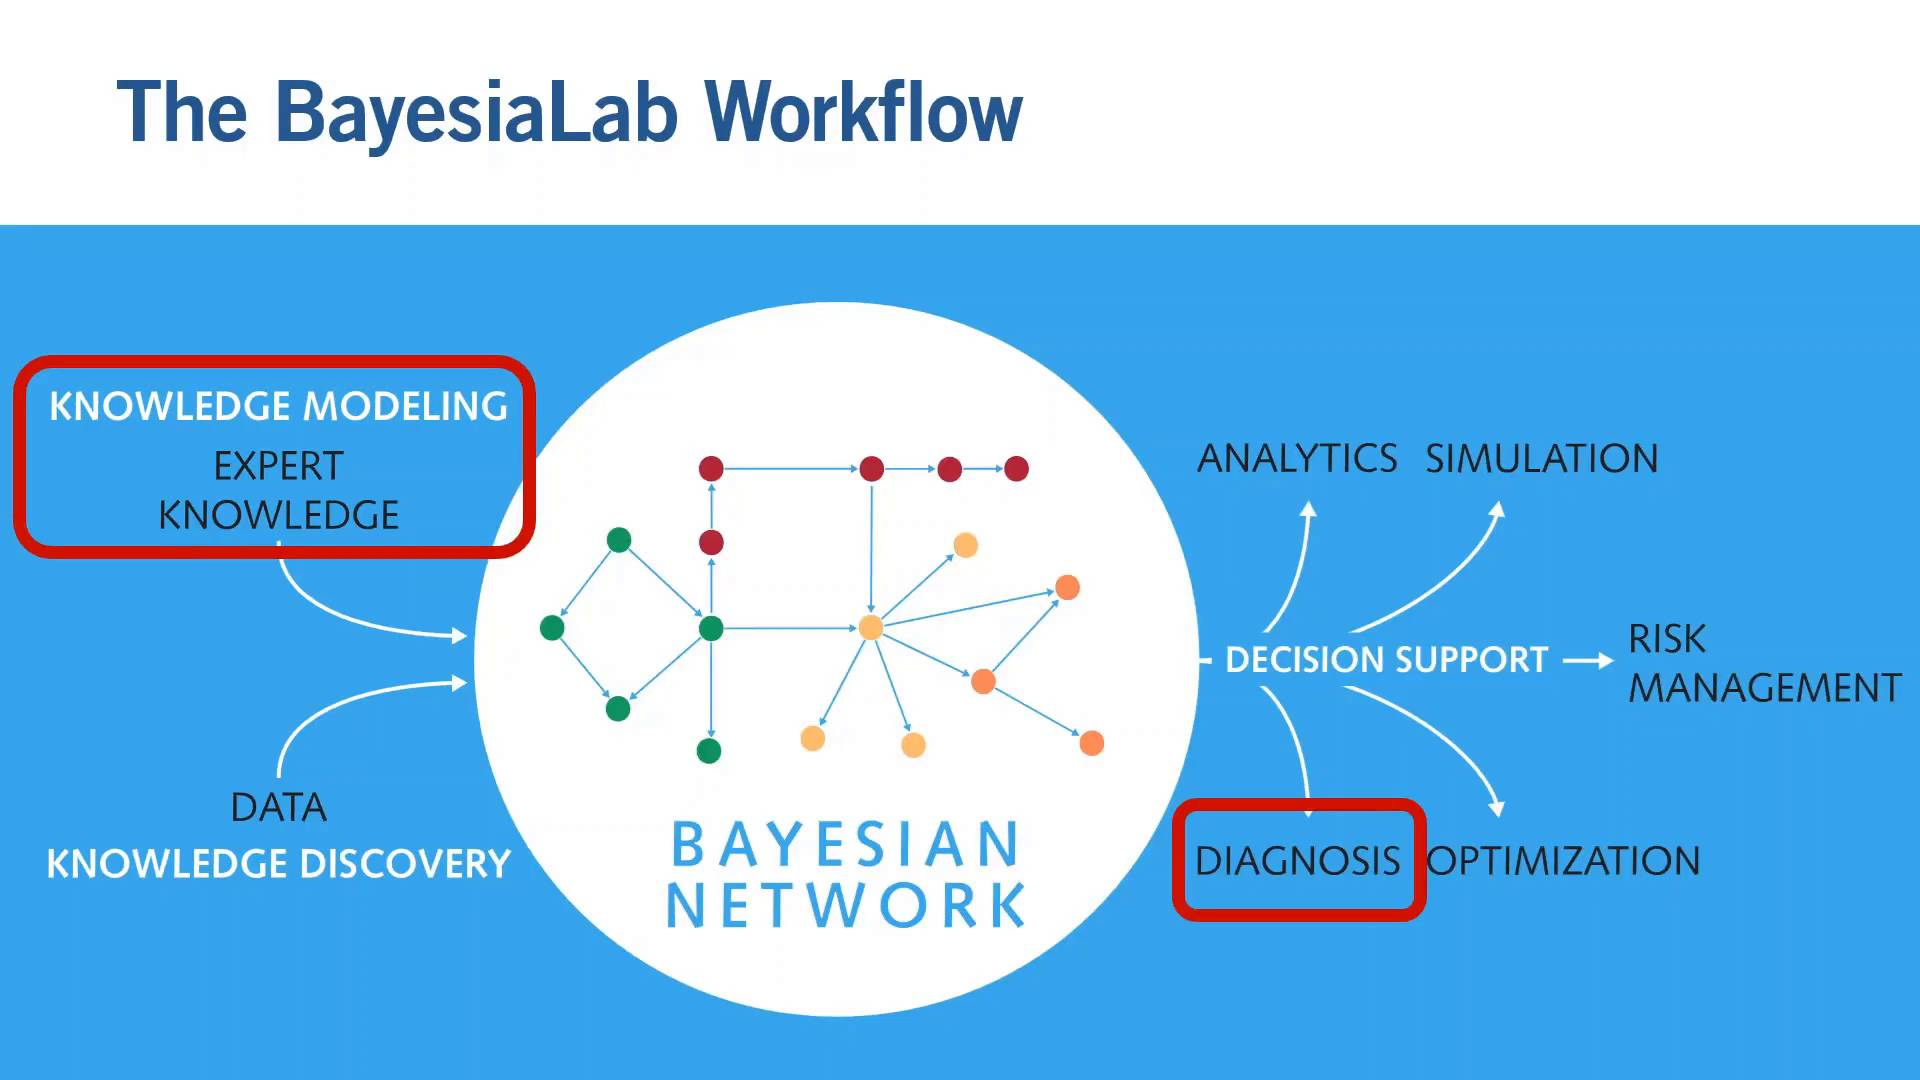
                    
                   

Naive Bayes assumes that the variables are independent and comes from a Gaussian distribution.


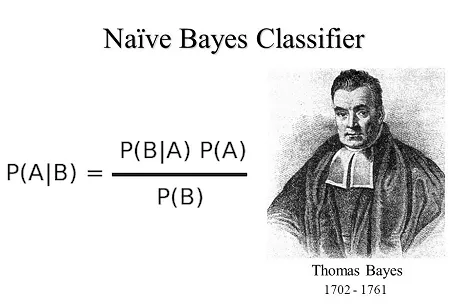

## Importing libraries  

In [1]:
import warnings 
# useful to alert the user of some condition in a program, where that condition (normally) doesn't warrant raising an exception and terminating the program
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB 
#main assumption for bayes is DV and IDV comes from gassuian distribution. Henceimporting Gaussian fucntions

#for test and train data set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

%matplotlib inline
# Suppress warnings
warnings.filterwarnings("ignore")

In [6]:
train=pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test=pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Aux units: implementing

In [17]:
def cross_validate(estimator, train, validation):
    X_train = train[0]
    Y_train = train[1]
    X_val = validation[0]
    Y_val = validation[1]
        
#train & testing sets:

    train_predictions = classifier.predict(X_train)
    train_accuracy = accuracy_score(train_predictions, Y_train)
    train_recall = recall_score(train_predictions, Y_train)
    train_precision = precision_score(train_predictions, Y_train)

#validation sets
    
    val_predictions = classifier.predict(X_val)
    val_accuracy = accuracy_score(val_predictions, Y_val)
    val_recall = recall_score(val_predictions, Y_val)
    val_precision = precision_score(val_predictions, Y_val)

    print('Model metrics')
    print('Accuracy  Train: %.2f, Validation: %.2f' % (train_accuracy, val_accuracy))
    print('Recall    Train: %.2f, Validation: %.2f' % (train_recall, val_recall))
    print('Precision Train: %.2f, Validation: %.2f' % (train_precision, val_precision))

## Data load

In [18]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')
test_ids = test_raw['PassengerId'].values

# Join data to analyse and process the set as one.
train_raw['train'] = 1
test_raw['train'] = 0
data = train_raw.append(test_raw, sort=False)

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [20]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
train          1309 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


## Data Preprocessing

In [22]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train'],
      dtype='object')

In [24]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,True,False,False,False,True,False,False,False,False,True,False,False
414,False,True,False,False,False,False,False,False,False,False,False,False,False
415,False,True,False,False,False,False,False,False,False,False,True,False,False
416,False,True,False,False,False,True,False,False,False,False,True,False,False


In [25]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,True,False,False,False,True,False,False,False,False,True,False,False
414,False,True,False,False,False,False,False,False,False,False,False,False,False
415,False,True,False,False,False,False,False,False,False,False,True,False,False
416,False,True,False,False,False,True,False,False,False,False,True,False,False


In [27]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [28]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train             0
dtype: int64

## EDA analysis

In [31]:
import seaborn as sns

import matplotlib.pyplot as plt
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train'],
      dtype='object')

In [33]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


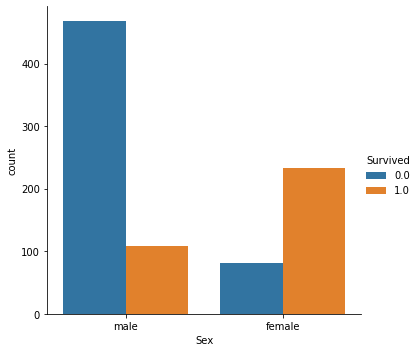

In [34]:
sns.catplot(x ="Sex", hue ="Survived",  
kind ="count", data = data) 

## Code : Pclass (Ordinal Feature) vs Survived

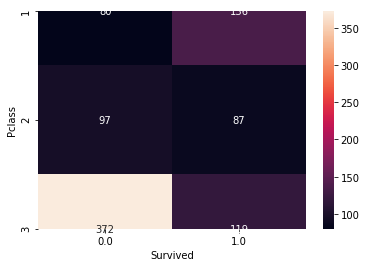

In [37]:
# Group the dataset by Pclass and Survived and then unstack them 
group = data.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
  
# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d") 

hiher passenger have higher survival rate

## Code : Age (Continuous Feature) vs Survived

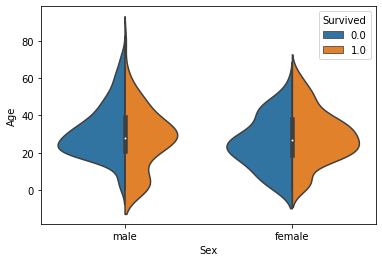

In [38]:
# Violinplot Displays distribution of data  
# across all levels of a category. 
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = data, split = True) 

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –

1.Good for children.


2.High for women in the age range 20-50.


3.Less for men as the age increases.

## Code : Factor plot for Family_Size (Count Feature) and Family Size.

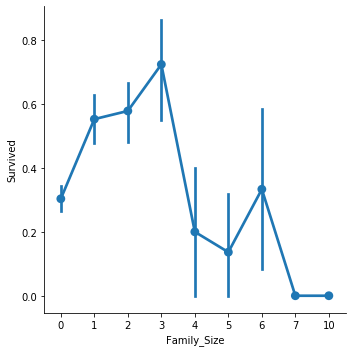

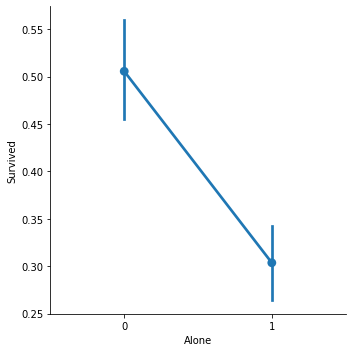

In [40]:
# Adding a column Family_Size 
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp'] 
  
# Adding a column Alone 
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1
  
# Factorplot for Family_Size 
sns.factorplot(x ='Family_Size', y ='Survived', data = data) 
  
# Factorplot for Alone 
sns.factorplot(x ='Alone', y ='Survived', data = data) 

Important observations –

If a passenger is alone, the survival rate is less.

If the family size is greater than 5, chances of survival decreases considerably.

## Code : Bar Plot for Fare (Continuous Feature)

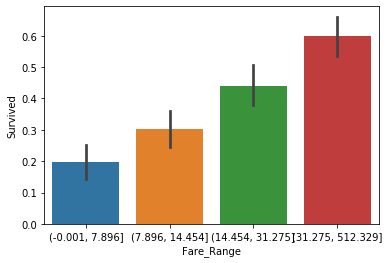

In [41]:
# Divide Fare into 4 bins 
data['Fare_Range'] = pd.qcut(data['Fare'], 4) 
  
# Barplot - Shows approximate values based  
# on the height of bars. 
sns.barplot(x ='Fare_Range', y ='Survived',  
data = data) 

It can be concluded that if a passenger paid a higher fare, the survival rate is more.

In [42]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train', 'Family_Size',
       'Alone', 'Fare_Range'],
      dtype='object')

In [43]:
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

data = data[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
data['Sex'] = data['Sex'].replace(["female", "male"], [0, 1])
data['Embarked'] = data['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
data['Age'] = pd.qcut(data['Age'], 10, labels=False)

In [44]:
# Split data into train and test.
train = data.query('train == 1')
test = data.query('train == 0')

# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values

In [45]:
train.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,train
0,2.0,1.0,7.2500,0,3,1,1,0.0,1
1,7.0,2.0,71.2833,0,1,0,1,1.0,1
2,4.0,1.0,7.9250,0,3,0,0,1.0,1
3,6.0,1.0,53.1000,0,1,0,1,1.0,1
4,6.0,1.0,8.0500,0,3,1,0,0.0,1


In [46]:
test.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,train
0,6.0,3.0,7.8292,0,3,1,0,NaN,0
1,8.0,1.0,7.0000,0,3,0,1,NaN,0
2,9.0,3.0,9.6875,0,2,1,0,NaN,0
3,4.0,1.0,8.6625,0,3,1,0,NaN,0
4,2.0,1.0,12.2875,1,3,0,1,NaN,0


## Correlation study

In [47]:
columns = train[features + [target]].columns.tolist()
nColumns = len(columns)
result = pd.DataFrame(np.zeros((nColumns, nColumns)), columns=columns)

In [50]:
print(columns)
print(result)

['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived']
   Age  Embarked  Fare  Parch  Pclass  Sex  SibSp  Survived
0  0.0       0.0   0.0    0.0     0.0  0.0    0.0       0.0
1  0.0       0.0   0.0    0.0     0.0  0.0    0.0       0.0
2  0.0       0.0   0.0    0.0     0.0  0.0    0.0       0.0
3  0.0       0.0   0.0    0.0     0.0  0.0    0.0       0.0
4  0.0       0.0   0.0    0.0     0.0  0.0    0.0       0.0
5  0.0       0.0   0.0    0.0     0.0  0.0    0.0       0.0
6  0.0       0.0   0.0    0.0     0.0  0.0    0.0       0.0
7  0.0       0.0   0.0    0.0     0.0  0.0    0.0       0.0


In [51]:

# Apply Pearson correlation on each pair of features.
for col_a in range(nColumns):
    for col_b in range(nColumns):
        result.iloc[[col_a], [col_b]] = pearsonr(train.loc[:, columns[col_a]], train.loc[:,  columns[col_b]])[0]
        
print(result)

        Age  Embarked      Fare     Parch    Pclass       Sex     SibSp  \
0  1.000000 -0.000003  0.093928 -0.156053 -0.356423  0.089382 -0.280664   
1 -0.000003  1.000000  0.176859 -0.014082 -0.108502 -0.097129  0.004021   
2  0.093928  0.176859  1.000000  0.206624 -0.552893 -0.182457  0.139860   
3 -0.156053 -0.014082  0.206624  1.000000  0.023666 -0.249543  0.383338   
4 -0.356423 -0.108502 -0.552893  0.023666  1.000000  0.150826  0.065187   
5  0.089382 -0.097129 -0.182457 -0.249543  0.150826  1.000000 -0.106296   
6 -0.280664  0.004021  0.139860  0.383338  0.065187 -0.106296  1.000000   
7 -0.053788  0.108517  0.266100  0.095265 -0.356462 -0.536762 -0.015523   

   Survived  
0 -0.053788  
1  0.108517  
2  0.266100  
3  0.095265  
4 -0.356462  
5 -0.536762  
6 -0.015523  
7  1.000000  


AxesSubplot(0.125,0.125;0.62x0.755)


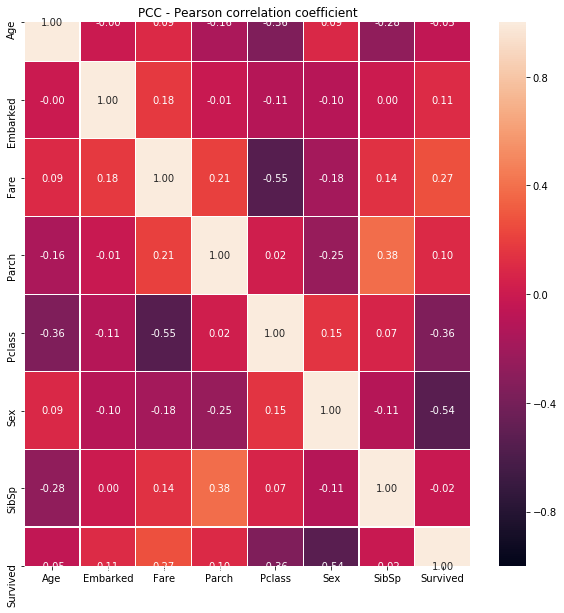

In [56]:
       
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(result, yticklabels=columns, vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=.2)
print(ax)
ax.set_title('PCC - Pearson correlation coefficient')
plt.show()

         "Fare" and "Pclass" seem to be highly related, so i'll                 remove "Pclass". 


          Also features like "Sex", "Pclass" and "Fare" should be               good predictors.

# Distribution study

In [57]:
continuous_numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
print(continuous_numeric_features)

['Age', 'Fare', 'Parch', 'SibSp']


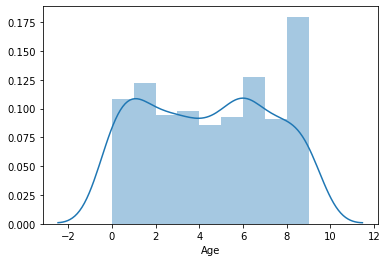

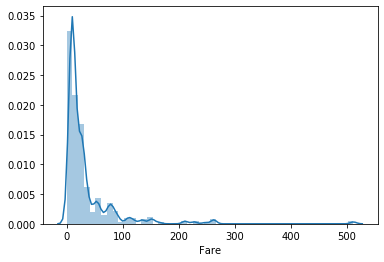

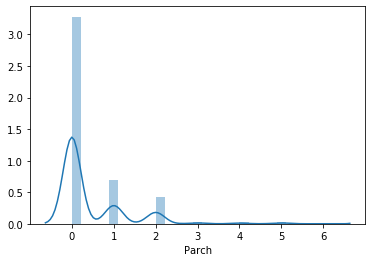

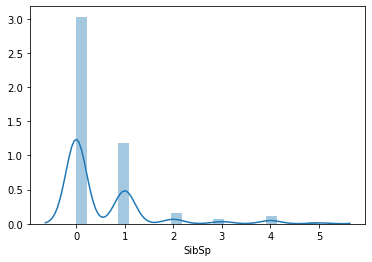

In [58]:
for feature in continuous_numeric_features:
    sns.distplot(train[feature])
    plt.show()

"Fare", "Parch" and "SibSp", have a distribution close to normal, but with a left side skew, "Age" have a distribution a a bit different from the other but maybe it's close enough to Gaussian.

In [59]:
train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)

## splitting data in train & validation (80% ~ 20%)

In [60]:
X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

In [61]:
X_train.head()


,Age,Embarked,Fare,Parch,Sex,SibSp
830,1.0,2.0,14.4542,0,0,1
566,1.0,1.0,7.8958,0,1,0
149,7.0,1.0,13.0000,0,1,0
106,2.0,1.0,7.6500,0,0,0
290,4.0,1.0,78.8500,0,0,0


In [65]:
X_val.head()

,Age,Embarked,Fare,Parch,Sex,SibSp
689,1.0,1.0,211.3375,1,0,0
279,6.0,1.0,20.2500,1,0,1
508,4.0,1.0,22.5250,0,1,0
9,0.0,2.0,30.0708,0,0,1
496,9.0,2.0,78.2667,0,0,1


In [67]:
Y_train

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0.

In [64]:
Y_val

array([1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0.])

## Classification: Naive Bayes Classifier

For example:

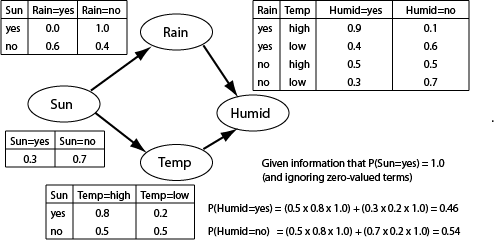

How Naive Bayes algorithm works?:

#Convert the data set into a frequency table
#Create Likelihood table by finding the probabilities.
#Now, use Naive Bayesian equation to calculate the posterior 

#probability for each class. The class with the highest posterior 

#probability is the outcome of prediction.

In [68]:
classifier = GaussianNB()

In [71]:
#fit the first part: Fitting the data
X_train1, X_train2, Y_train1, Y_train2 = train_test_split(X_train, Y_train, test_size=0.3, 
                                                          random_state=12)

classifier.fit(X_train2, Y_train2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [72]:
print('Metrics with only 30% of train data')
cross_validate(classifier, (X_train, Y_train), (X_val, Y_val))

Metrics with only 30% of train data
Model metrics
Accuracy  Train: 0.79, Validation: 0.76
Recall    Train: 0.75, Validation: 0.71
Precision Train: 0.71, Validation: 0.71


## updateing the model with other part:

We can update it by just fitting the model again with more data.

In [74]:
X_train1.head()

,Age,Embarked,Fare,Parch,Sex,SibSp
620,4.0,2.0,14.4542,0,1,1
406,9.0,1.0,7.7500,0,1,0
882,2.0,1.0,10.5167,0,0,0
824,0.0,1.0,39.6875,1,1,4
333,1.0,1.0,18.0000,0,1,2


In [76]:
Y_train

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0.

In [77]:
classifier.partial_fit(X_train1, Y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
print('Metrics with the remaining 70% of train data')
cross_validate(classifier, (X_train, Y_train), (X_val, Y_val))

Metrics with the remaining 70% of train data
Model metrics
Accuracy  Train: 0.80, Validation: 0.76
Recall    Train: 0.78, Validation: 0.70
Precision Train: 0.69, Validation: 0.69


In [79]:
#checking probablity 
print('Probability of each class')
print('Survive = 0: %.2f' % classifier.class_prior_[0])
print('Survive = 1: %.2f' % classifier.class_prior_[1])

Probability of each class
Survive = 0: 0.60
Survive = 1: 0.40


In [80]:
print('Mean of each feature per class')
print('               Age         Embarked   Fare         Parch       Sex         SibSp')
print('Survive = 0: %s' % classifier.theta_[0])
#checprint('Survive = 1: %s' % classifier.theta_[1])

Mean of each feature per class
               Age         Embarked   Fare         Parch       Sex         SibSp
Survive = 0: [ 4.5339233   1.23893805 22.97357316  0.37463127  0.86135693  0.5280236 ]
Survive = 1: [ 4.27391304  1.33478261 53.52155957  0.52608696  0.33043478  0.49130435]


In [81]:
#checking missing values 
test.fillna(test.mean(), inplace=True)
test_predictions = classifier.predict(test)
submission = pd.DataFrame({'PassengerId': test_ids})
submission['Survived'] = test_predictions.astype('int')
submission.to_csv('submission.csv', index=False)
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
